In [2]:
library(ggplot2)
library(dplyr)

In [3]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [4]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results_permG/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 542

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000100028,2,22,0.8564981,22_24852233_T_A
1,ENSG00000100028,2,22,0.8014707,22_24853465_G_A


In [5]:
genes = as.character(unique(crm_int$gene))
# head(genes)

In [6]:
fvf_filename = paste0(revision_folder,"/CRM_interaction_chr22/fvf.csv")
fvf = read.csv(fvf_filename, row.names=1)
head(fvf)
all_genes = unique(gsub("_.*","",fvf$feature))
# head(all_genes)

feature,snpID,chrom
ENSG00000100206_DMC1,22_38815543_G_T,22
ENSG00000100206_DMC1,22_38815767_C_T,22
ENSG00000100206_DMC1,22_38816059_T_C,22
ENSG00000100206_DMC1,22_38816351_G_A,22
ENSG00000100206_DMC1,22_38817047_A_G,22
ENSG00000100206_DMC1,22_38817105_C_T,22


In [7]:
missing_genes = all_genes[!(all_genes %in% genes)]
as.character(unique(fvf[gsub("_.*","",fvf$feature) %in% missing_genes,"feature"]))

character(0)

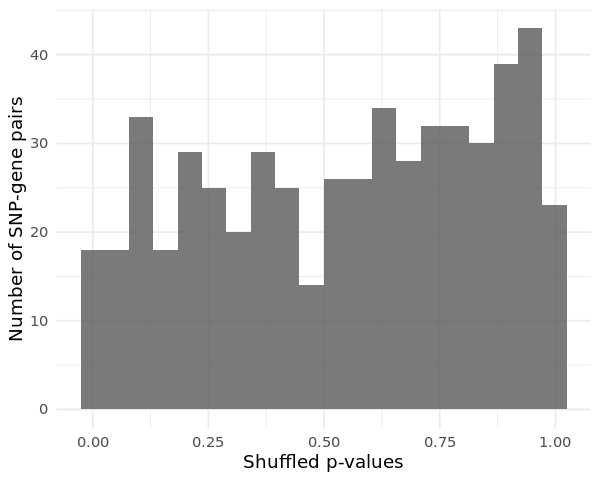

In [8]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(crm_int, aes(x=pv_raw)) + geom_histogram(alpha = 0.8, bins=20) + 
    xlab("Shuffled p-values") + 
    ylab("Number of SNP-gene pairs") + theme_minimal()

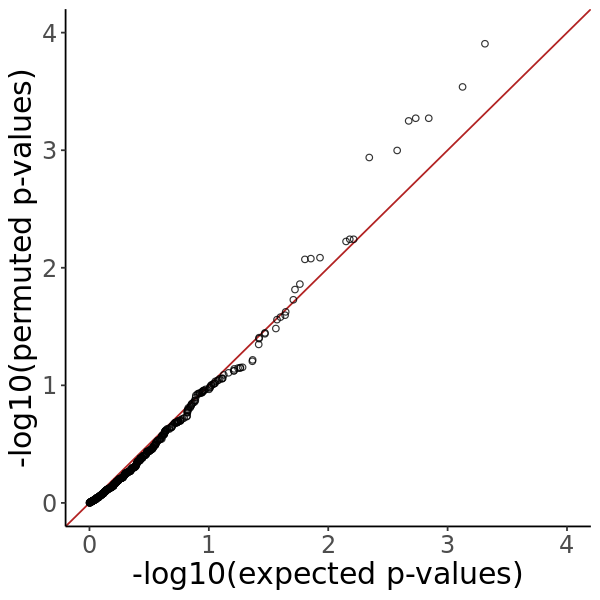

In [57]:
options(repr.plot.width=5, repr.plot.height=5)
crm_int$pv_uniform = runif(dim(crm_int)[1], min = 0, max = 1)
p = ggplot(crm_int, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + 
    geom_abline(slope = 1, intercept = 0, col = "firebrick") +
    geom_point(alpha = 0.8, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
    theme_classic() + xlim(c(0,4)) + ylim(c(0,4)) +
    theme(legend.position="none", panel.border = element_blank()) + theme(text = element_text(size=18))
p

In [58]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF7A_endodiff.pdf"), width=5, height=5)
p
dev.off()

png 
  2